In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [2]:
# Pandas_datareader is a module for accessing online data
import pandas_datareader as pdr # Need to first install pandas-datareader package
from pandas_datareader import data, wb

In [3]:
# Set up End and Start times
end = datetime.now() # Current Day
start = datetime(end.year - 1, end.month, end.day) # 1 year worth of information

# Run Once then Read from Offline Excel File
"""
closing_df = (pdr.yahoo.daily.YahooDailyReader(['AAPL','GOOG','MSFT','AMZN'], start, end).read())['Adj Close']
closing_df.to_excel('adjClose_AAPL_GOOG_MSFT_AMZN.xlsx', sheet_name='Sheet 1')
closing_df.head()
"""

"\nclosing_df = (pdr.yahoo.daily.YahooDailyReader(['AAPL','GOOG','MSFT','AMZN'], start, end).read())['Adj Close']\nclosing_df.to_excel('adjClose_AAPL_GOOG_MSFT_AMZN.xlsx', sheet_name='Sheet 1')\nclosing_df.head()\n"

In [4]:
adjClose_df = pd.read_excel('adjClose_AAPL_GOOG_MSFT_AMZN.xlsx', sheet_name = 'Sheet 1', index_col = 0)
adjClose_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-10-26,114.314743,1590.449951,208.169830,3207.040039
2020-10-27,115.854836,1604.260010,211.311005,3286.330078
2020-10-28,110.489342,1516.619995,200.837128,3162.780029
2020-10-29,114.583015,1567.239990,202.858551,3211.010010
2020-10-30,108.164314,1621.010010,200.629028,3036.149902


In [5]:
pctChg_df = (adjClose_df.pct_change()).dropna() # Convert adjusted close data to percent change to normalize
pctChg_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-10-27,0.013472,0.008683,0.015089,0.024724
2020-10-28,-0.046312,-0.054630,-0.049566,-0.037595
2020-10-29,0.037050,0.033377,0.010065,0.015249
2020-10-30,-0.056018,0.034309,-0.010991,-0.054456
2020-11-02,-0.000827,0.003097,-0.000692,-0.010431


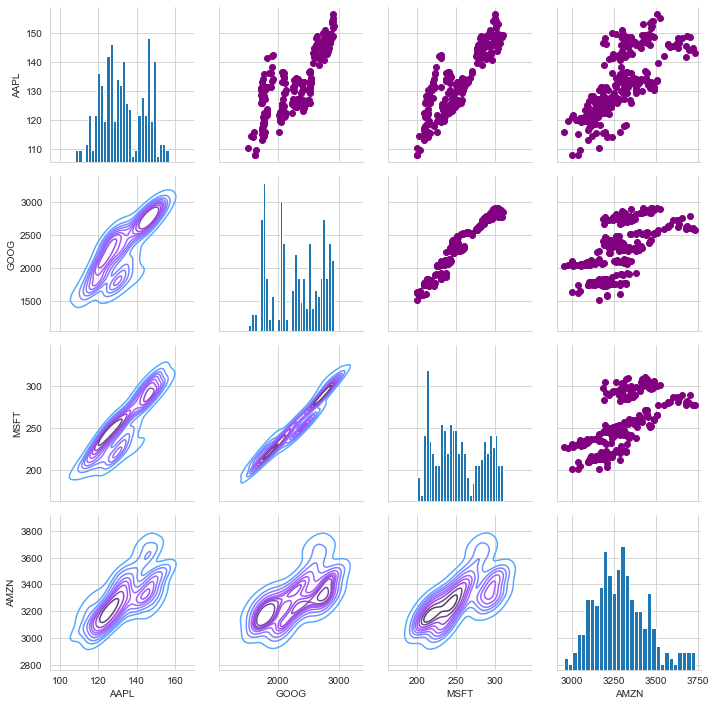

In [6]:
# Custom Pair Plot for Adjusted Close

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(adjClose_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color = 'purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins = 30)

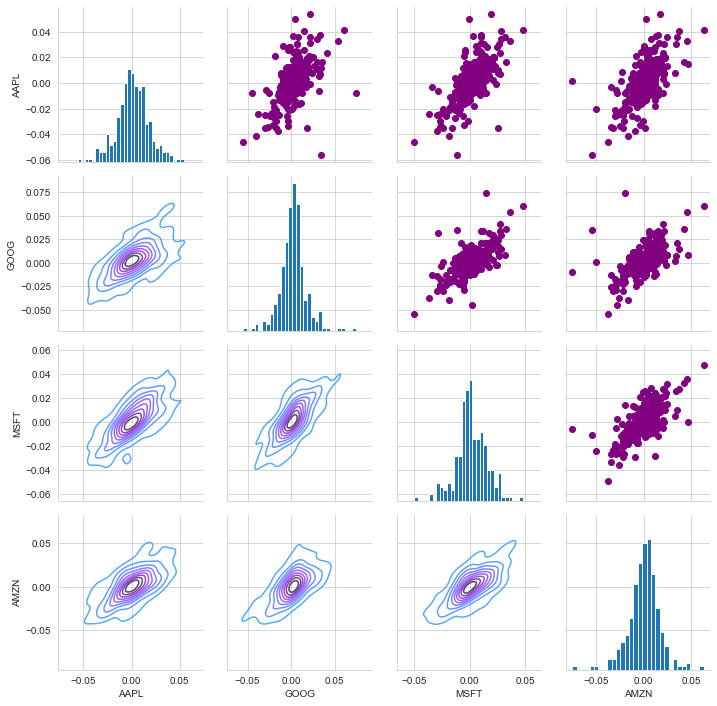

In [7]:
# Custom Pair Plot for Adjusted Close

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(pctChg_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color = 'purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins = 30)

          AAPL      GOOG      MSFT      AMZN
AAPL  1.000000  0.543672  0.697632  0.635510
GOOG  0.543672  1.000000  0.686876  0.559083
MSFT  0.697632  0.686876  1.000000  0.671944
AMZN  0.635510  0.559083  0.671944  1.000000
[[ True  True  True  True]
 [False  True  True  True]
 [False False  True  True]
 [False False False  True]]


<AxesSubplot:>

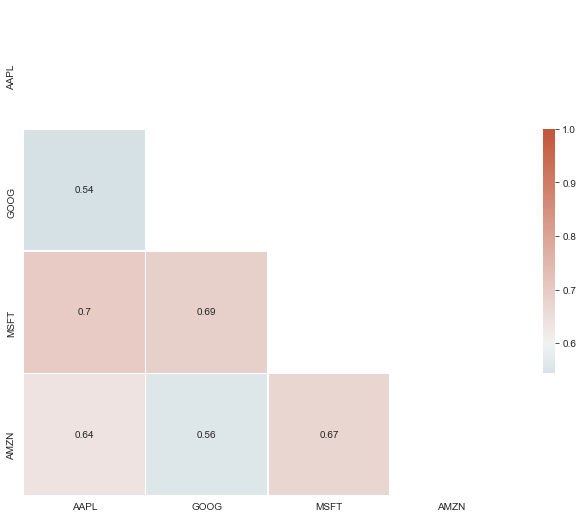

In [8]:
# Correlation Plot

corr = (pctChg_df).corr()
print(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) # Get a boolean 
print(mask)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9)) # Enlarge the HeatMap

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0.6,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)

          AAPL      GOOG      MSFT      AMZN
AAPL  1.000000  0.543672  0.697632  0.635510
GOOG  0.543672  1.000000  0.686876  0.559083
MSFT  0.697632  0.686876  1.000000  0.671944
AMZN  0.635510  0.559083  0.671944  1.000000
[[ True False False False]
 [ True  True False False]
 [ True  True  True False]
 [ True  True  True  True]]


<AxesSubplot:>

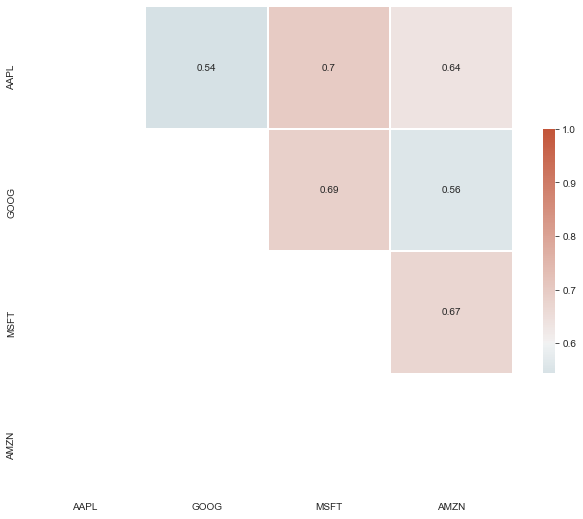

In [9]:
# Correlation Plot

corr = (pctChg_df).corr()
print(corr)

# Generate a mask for the lower triangle
mask = np.tril(np.ones_like(corr, dtype=bool)) # Get a boolean 
print(mask)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9)) # Enlarge the HeatMap

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0.6,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)

          AAPL      GOOG      MSFT      AMZN
AAPL  1.000000  0.543672  0.697632  0.635510
GOOG  0.543672  1.000000  0.686876  0.559083
MSFT  0.697632  0.686876  1.000000  0.671944
AMZN  0.635510  0.559083  0.671944  1.000000
[[ True  True  True  True]
 [False  True  True  True]
 [False False  True  True]
 [False False False  True]]


<AxesSubplot:>

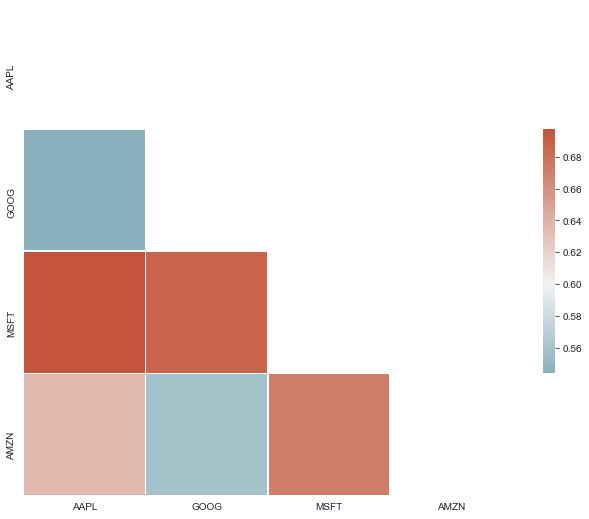

In [10]:
# Correlation Plot

corr = (pctChg_df).corr()
print(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) # Get a boolean 
print(mask)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9)) # Enlarge the HeatMap

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0.6,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5}, ax = ax)

          AAPL      GOOG      MSFT      AMZN
AAPL  1.000000  0.543672  0.697632  0.635510
GOOG  0.543672  1.000000  0.686876  0.559083
MSFT  0.697632  0.686876  1.000000  0.671944
AMZN  0.635510  0.559083  0.671944  1.000000
[[ True  True  True  True]
 [False  True  True  True]
 [False False  True  True]
 [False False False  True]]


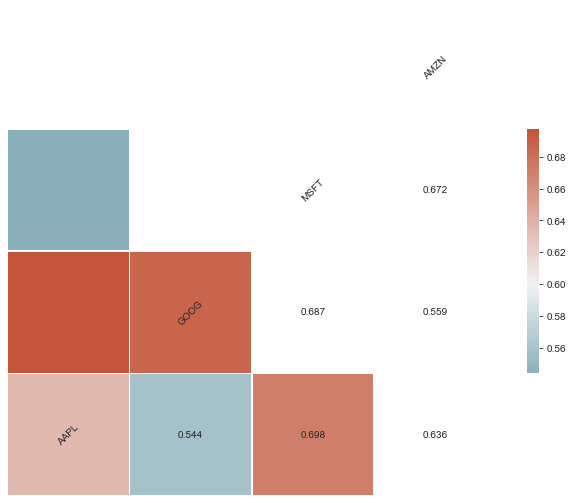

In [11]:
# Correlation Plot

corr = (pctChg_df).corr()
print(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) # Get a boolean 
print(mask)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9)) # Enlarge the HeatMap

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0.6,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5}, ax = ax)

for i in range(len(corr)):
    ax.text(i + 0.5, len(corr) - (i+0.5), corr.columns[i], 
            ha = "center", va = "center", rotation = 45)
    for j in range(i + 1, len(corr)):
        s = "{:.3f}".format(corr.values[i, j])
        ax.text(j + 0.5, len(corr) - (i + 0.5), s, 
            ha = "center", va = "center")
        
ax.axis("off")
plt.show()

          AAPL      GOOG      MSFT      AMZN
AAPL  1.000000  0.543672  0.697632  0.635510
GOOG  0.543672  1.000000  0.686876  0.559083
MSFT  0.697632  0.686876  1.000000  0.671944
AMZN  0.635510  0.559083  0.671944  1.000000
[[ True  True  True  True]
 [False  True  True  True]
 [False False  True  True]
 [False False False  True]]


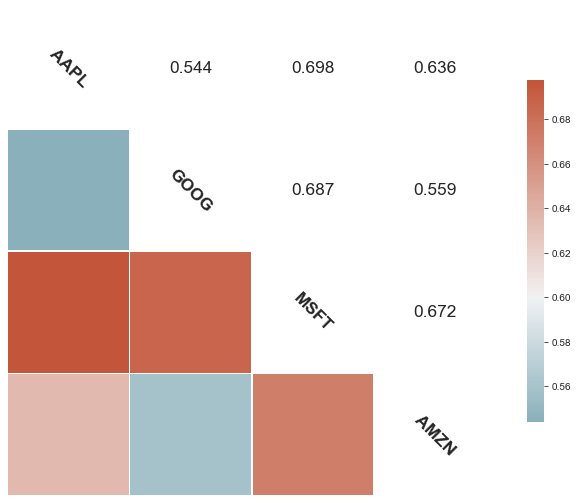

In [22]:
# Correlation Plot

corr = (pctChg_df).corr()
#print(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) # Get a boolean 
#print(mask)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9)) # Enlarge the HeatMap

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# Manually set center based on data. To be Automated.
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0.6, 
            square = True, linewidths = .5, cbar_kws = {"shrink": .7}, ax = ax)

fontdict_diag = {'fontsize': 'xx-large', 'fontweight': 'bold'}
fontdict_gen = {'fontsize': 'xx-large'}

# Diagonal Notation Manual Setup
# ax.text(0 + 0.5, 0 + 0.5, corr.columns[0], ha = 'center', va = 'center', rotation = -45, fontdict = fontdict_diag)

# Upper Triangle Notation Manual Setup
# ax.text(1 + 0.5, 0 + 0.5, "{:.3f}".format(corr.values[0, 1]), ha = 'center', va = 'center', fontdict = fontdict_gen)
# ax.text(2 + 0.5, 0 + 0.5, "{:.3f}".format(corr.values[0, 2]), ha = 'center', va = 'center', fontdict = fontdict_gen)

for i in range(len(corr)):
    # Diagonal Notation
    ax.text(i + 0.5, i + 0.5, corr.columns[i], ha = 'center', va = 'center', rotation = -45, fontdict = fontdict_diag)
    for j in range(i + 1, len(corr)):
        # Upper Triangle Notation
        ax.text(j + 0.5, i + 0.5, "{:.3f}".format(corr.values[i, j]), ha = 'center', va = 'center', fontdict = fontdict_gen)

ax.axis("off")
plt.show()